# **Import Independance**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (classification_report , accuracy_score , confusion_matrix, ConfusionMatrixDisplay ,
                            roc_curve, roc_auc_score, f1_score, precision_score, recall_score,mean_absolute_error,
                             mean_squared_error, r2_score, root_mean_squared_error,RocCurveDisplay,roc_curve, auc)
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV

In [ ]:
!pip install shap

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=95e333fed07a5b91ea5aeba523612d8079510912dfe715f93acad1fd638dfedc
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:
import shap
import lime
import lime.lime_tabular

# **Read Cleaned Data**

In [103]:
df = pd.read_csv('/content/Cleaned Survey Data.csv')
df.head()

Country and areas  Survey year     Year*  United Nations Region  \
0          -0.646529    -0.646529 -0.646529              -0.156338   
1          -0.646529    -0.062787 -0.079941              -0.156338   
2          -0.646529     0.188895  0.188895              -0.156338   
3          -0.646529     0.188895  0.188895              -0.156338   
4          -0.646529    -0.646529 -0.646529              -0.646529   

   United Nations Sub-Region  SDG Region  UNICEF Region  UNICEF Sub-Region  \
0                   0.188895   -0.646529       0.188895           0.188895   
1                   0.188895   -0.646529       0.188895           0.188895   
2                   0.188895   -0.646529       0.188895           0.188895   
3                   0.188895   -0.646529       0.188895           0.188895   
4                  -0.458639    0.188895       0.188895          -0.543468   

   WHO Region  World Bank Income Classification  ...  WHZ Survey Sample (N)  \
0    0.134910                         -0.646529  ...              -0.055857   
1    0.134910                         -0.646529  ...              -0.055881   
2    0.134910                         -0.646529  ...              -0.029237   
3    0.134910                         -0.646529  ...              -0.055769   
4   -0.646529                          0.166312  ...              -0.055877   

   Severe Wasting   Wasting  Overweight  Stunting  Underweight    Source  \
0       -0.288422  0.188895    0.087754  0.188895     0.188895 -0.646529   
1        0.188895  0.188895   -0.331965  0.188895     0.188895  0.188895   
2        0.188895  0.188895   -0.177332  0.188895     0.188895 -0.646529   
3       -0.231118 -0.333195   -0.442417  0.188895     0.188895 -0.646529   
4       -0.116509  0.188895   -0.646529  0.188895     0.188895 -0.277962   

   Short Source  Fieldwork Period  U5 Population ('000s)  
0     -0.249044         -0.646529              -0.134644  
1      0.188895          0.188895              -0.076843  
2      0.188895          0.188895              -0.036998  
3      0.188895          0.133345              -0.027458  
4     -0.249044         -0.646529              -0.200877  

[5 rows x 22 columns]

# **feature Engineer**
-Target and Label Engineer

In [ ]:
#get the value of the cols
df[['Severe Wasting', 'Wasting', 'Stunting', 'Underweight']].describe()

Severe Wasting     Wasting      Stunting  Underweight
count      997.000000  997.000000  9.970000e+02   997.000000
mean        -0.248258   -0.214981 -1.633477e-01    -0.216749
std          0.322155    0.363396  3.704254e-01     0.370059
min         -0.646529   -0.646529 -6.465292e-01    -0.646529
25%         -0.632248   -0.646529 -6.465292e-01    -0.646529
50%         -0.288422   -0.150825 -1.846525e-16    -0.186666
75%          0.188895    0.188895  1.888947e-01     0.188895
max          0.188895    0.188895  1.888947e-01     0.188895

In [ ]:
#be sured from the scaling
df[['Severe Wasting', 'Wasting', 'Stunting', 'Underweight']].max()

Severe Wasting    0.188895
Wasting           0.188895
Stunting          0.188895
Underweight       0.188895
dtype: float64

In [ ]:
# For standardized/scaled data, pick an appropriate threshold
df['Malnourished'] = ( (df['Severe Wasting'] > 0.1) |
                      (df['Wasting'] > 0.1) |
                      (df['Stunting'] > 0.1) |
                      (df['Underweight'] > 0.1)
                    ).astype(int)

In [ ]:
print(df['Malnourished'].value_counts(normalize=True))

Malnourished
1    0.58676
0    0.41324
Name: proportion, dtype: float64


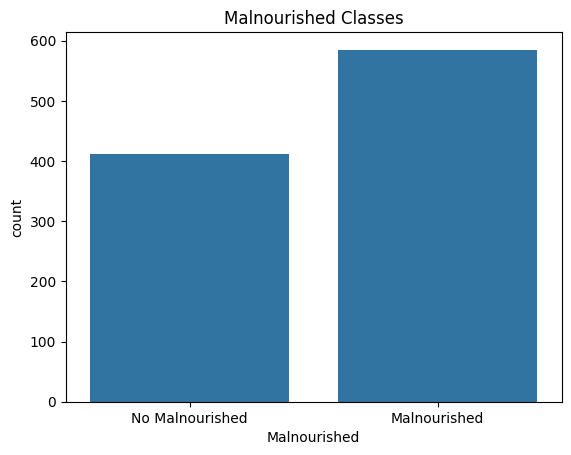

In [ ]:
#showing them after applying under sampling
sns.countplot(x='Malnourished', data=df)
plt.title('Malnourished Classes')
plt.xticks([0,1],['No Malnourished','Malnourished'])
plt.show()

**Aggregates**

In [ ]:
mal_cols = ['Severe Wasting', 'Wasting', 'Stunting', 'Underweight']

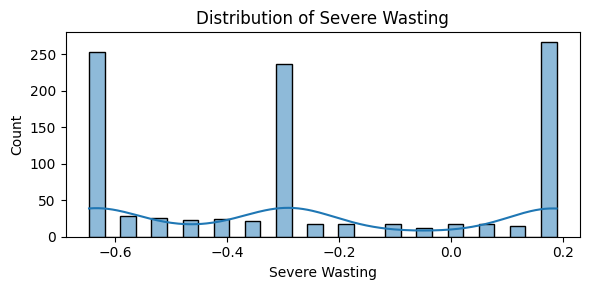

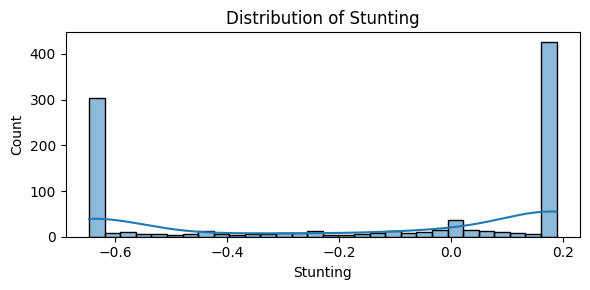

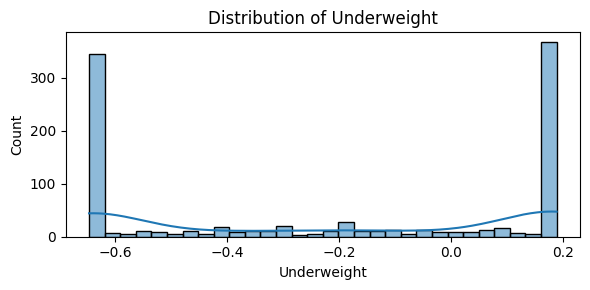

In [ ]:
for col in mal_cols:
    if col in df.columns:
        plt.figure(figsize=(6, 3))
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.tight_layout()
        plt.show()

In [ ]:
# Create the Avg_Malnutrition column
df['Avg_Malnutrition'] = df[mal_cols].mean(axis=1)

**Burden Estimates**

In [ ]:
print(df.columns)

Index(['Country and areas', 'Survey year', 'Year*', 'United Nations Region',
       'United Nations Sub-Region', 'SDG Region', 'UNICEF Region',
       'UNICEF Sub-Region', 'WHO Region', 'World Bank Income Classification',
       'World Bank Region', 'WHO Global Database Number',
       'WHZ Survey Sample (N)', 'Severe Wasting', 'Wasting', 'Overweight',
       'Stunting', 'Underweight', 'Source', 'Short Source', 'Fieldwork Period',
       'U5 Population ('000s)', 'Malnourished', 'Avg_Malnutrition'],
      dtype='object')


In [ ]:
# Assuming column is named exactly like this:
df['Underweight_Burden'] = df['Underweight'] * df["U5 Population ('000s)"]

# **Supervised Models**

# **-Classification Models**

In [ ]:
#Split the data
X = df.drop(columns=['Malnourished','Severe Wasting', 'Wasting', 'Stunting', 'Underweight','Avg_Malnutrition', 'Underweight_Burden'])
y = df['Malnourished']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state=48)

In [ ]:
#Scaling the train data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# *Logistic Regression Model*

In [ ]:
#fit logistic model for binary classification
log_model = LogisticRegression()
log_model.fit(X_train_scaled,y_train)

LogisticRegression()

In [ ]:
#get prediction
y_log_pred = log_model.predict(X_test_scaled)
y_log_pred

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0])

In [ ]:
#Evaluate the model
log_acc = accuracy_score(y_test,y_log_pred)
print("Accuracy is : ",log_acc)

Accuracy is :  0.815


In [ ]:
print("Classification report is : ",classification_report(y_test,y_log_pred))

Classification report is :                precision    recall  f1-score   support

           0       0.82      0.79      0.80        96
           1       0.81      0.84      0.82       104

    accuracy                           0.81       200
   macro avg       0.82      0.81      0.81       200
weighted avg       0.82      0.81      0.81       200



Confusion matrix of logistic regression [[76 20]
 [17 87]]


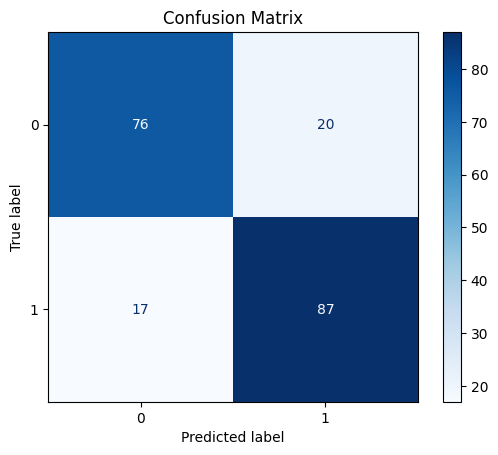

In [ ]:
log_conf = confusion_matrix(y_test,y_log_pred)
print("Confusion matrix of logistic regression",log_conf)
display_conf = ConfusionMatrixDisplay(confusion_matrix = log_conf)
display_conf.plot(cmap=plt.cm.Blues)  # You can choose other colormaps too
plt.title('Confusion Matrix')
plt.show()

**Explainability Techniques For Interpretation**

1-Local Agnostic Models(SHAP)

In [ ]:
explainer = shap.Explainer(log_model, X_train_scaled)
shap_values = explainer(X_train_scaled)

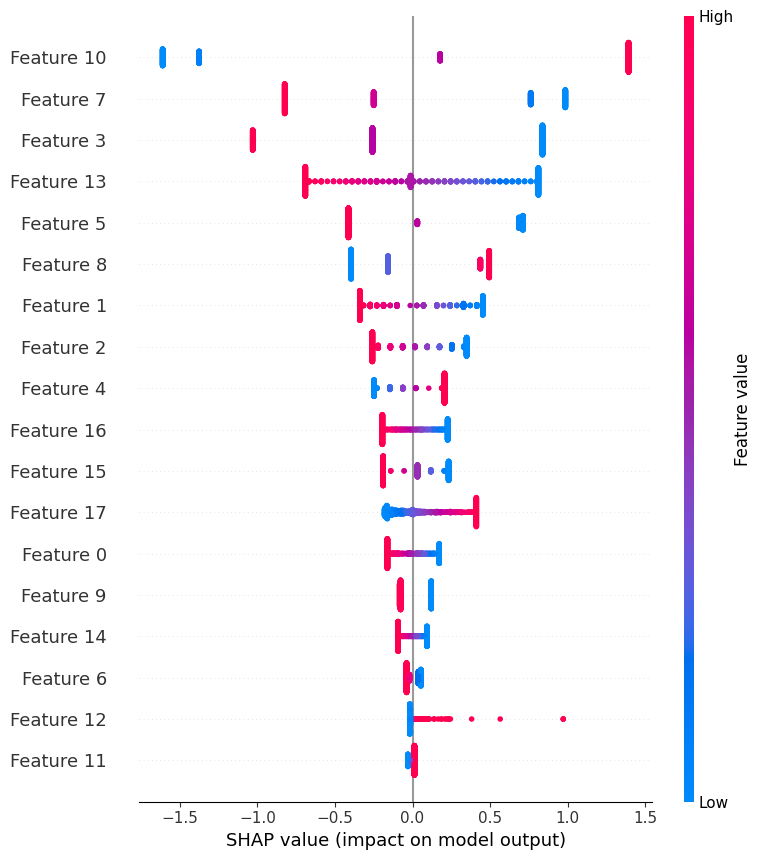

In [ ]:
shap.summary_plot(shap_values, X_train_scaled)

**2-Global Agnostic Models (Permutation)**

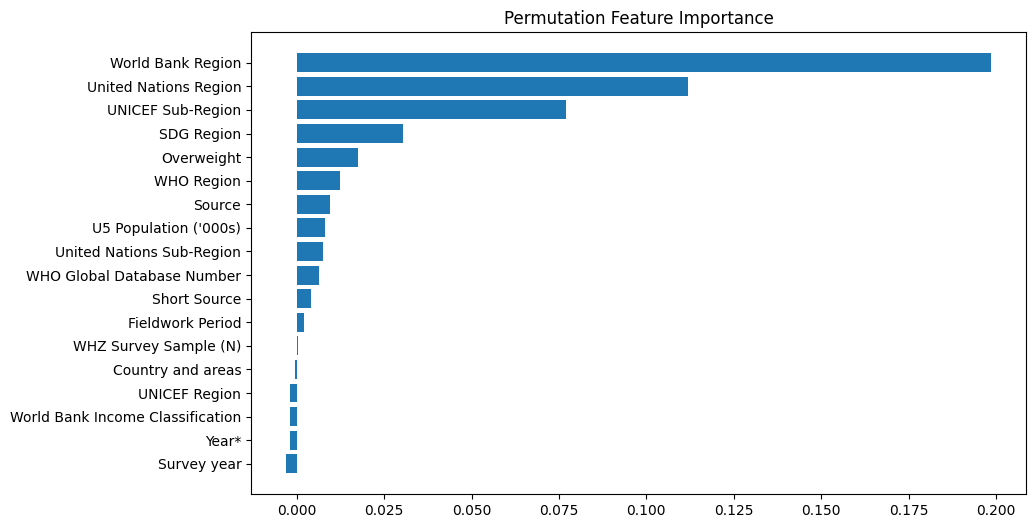

In [ ]:
result = permutation_importance(log_model, X_test_scaled, y_test, n_repeats=10, random_state=42)
sorted_idx = result.importances_mean.argsort()
plt.figure(figsize=(10, 6))
plt.barh(X.columns[sorted_idx], result.importances_mean[sorted_idx])
plt.title("Permutation Feature Importance")
plt.show()

# *Random Forest Classifier*

In [ ]:
#Fit RFC on data
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
#Get prediction
y_rfc_pred = rfc.predict(X_test)
y_rfc_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1])

In [ ]:
#Evaluate the model
rfc_acc = accuracy_score(y_test,y_rfc_pred)
print("Accuracy is : ",rfc_acc)

Accuracy is :  0.84


In [ ]:
print("Classification report is : ",classification_report(y_test,y_rfc_pred))

Classification report is :                precision    recall  f1-score   support

           0       0.84      0.82      0.83        96
           1       0.84      0.86      0.85       104

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200



Confusion matrix of Random Forest Classifier [[79 17]
 [15 89]]


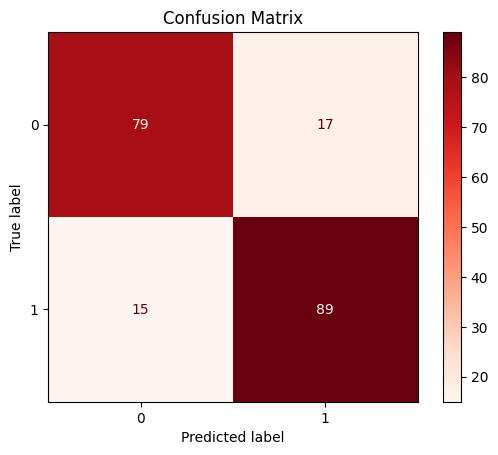

In [ ]:
rfc_conf = confusion_matrix(y_test,y_rfc_pred)
print("Confusion matrix of Random Forest Classifier",rfc_conf)
display_conf = ConfusionMatrixDisplay(confusion_matrix = rfc_conf)
display_conf.plot(cmap=plt.cm.Reds)
plt.title('Confusion Matrix')
plt.show()

**Explainability Techniques For Interpretation**

**1-Local Agnostic Models(Lime)**

In [ ]:
explainer_rf = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X.columns,
    class_names=['Not Malnourished', 'Malnourished'],
    mode='classification'
)

In [ ]:
# Explain a single prediction (e.g., first test sample)
i = 0  # index of the sample to explain
exp_rf = explainer_rf.explain_instance(
    data_row=X_test.iloc[i],
    predict_fn=rfc.predict_proba
)

/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

In [ ]:
# Show explanation
exp_rf.show_in_notebook(show_table=True)

**2-Local Agnostic Models(Shap)**

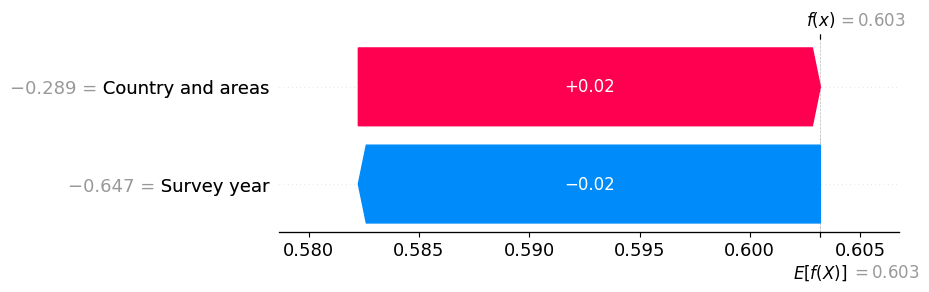

In [ ]:
# Use TreeExplainer for Random Forest
explainer_rf = shap.TreeExplainer(rfc)

# Compute SHAP values
shap_values_rf = explainer_rf.shap_values(X_test)

# Check class 1 SHAP values (malnourished class)
shap_values_rf_class1 = shap_values_rf[1]

# Waterfall plot for first test sample
shap.plots.waterfall(shap.Explanation(
    values=shap_values_rf_class1[0],
    base_values=explainer_rf.expected_value[1],
    data=X_test.iloc[0],
    feature_names=X_test.columns
))


# *XGBoost Model*

In [ ]:
#Fit XGBoost Model
xg_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xg_model.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:01:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Get prediction
y_xg_pred = xg_model.predict(X_test)
y_xg_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1])

In [ ]:
#Evaluate the model
xg_acc = accuracy_score(y_test,y_xg_pred)
print("Accuracy is : ",xg_acc)

Accuracy is :  0.85


In [ ]:
print("Classification report is : ",classification_report(y_test,y_xg_pred))

Classification report is :                precision    recall  f1-score   support

           0       0.84      0.85      0.85        96
           1       0.86      0.85      0.85       104

    accuracy                           0.85       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.85      0.85      0.85       200



Confusion matrix of Random Forest Classifier [[82 14]
 [16 88]]


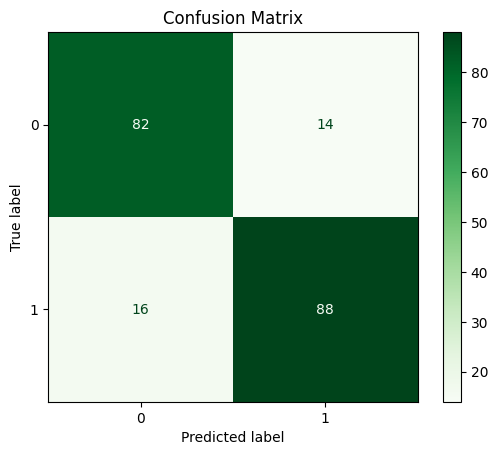

In [ ]:
xg_conf = confusion_matrix(y_test,y_xg_pred)
print("Confusion matrix of Random Forest Classifier",xg_conf)
display_conf = ConfusionMatrixDisplay(confusion_matrix = xg_conf)
display_conf.plot(cmap=plt.cm.Greens)
plt.title('Confusion Matrix')
plt.show()

**Explainability Techniques For Interpretation**

**1-Local Agnostic Models(Lime)**

In [ ]:
explainer_xgb = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X.columns,
    class_names=['Not Malnourished', 'Malnourished'],
    mode='classification'
)

In [ ]:
# Explain the same instance
exp_xgb = explainer_xgb.explain_instance(
    data_row=X_test.iloc[i],
    predict_fn=xg_model.predict_proba
)

/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

In [ ]:
exp_xgb.show_in_notebook(show_table=True)

**2-Local Agnostic Models(Shap)**

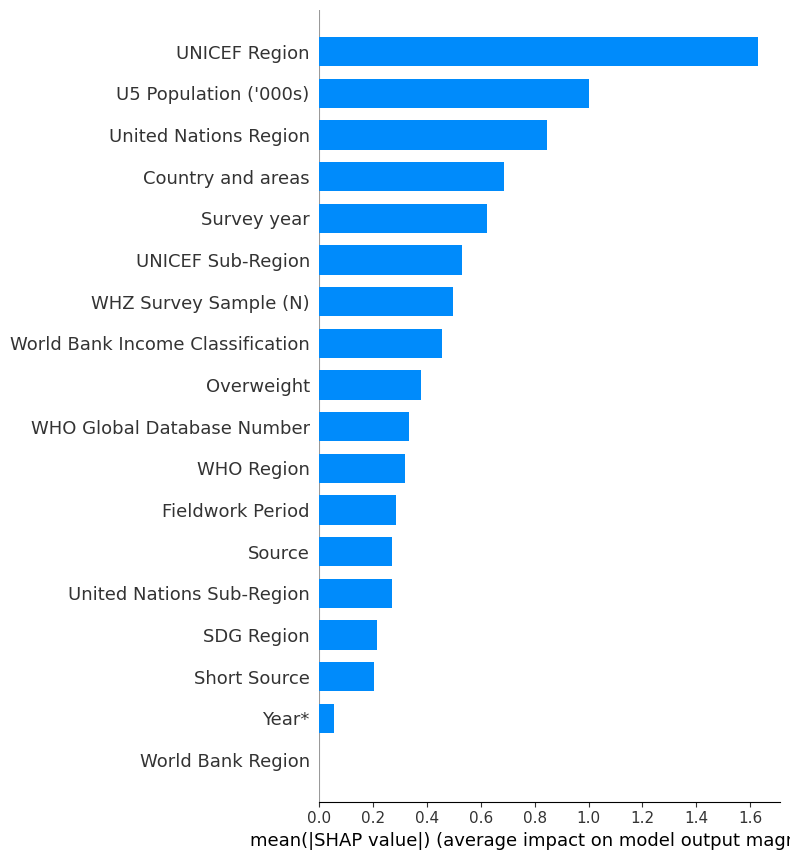

In [ ]:
# Use the TreeExplainer for XGBoost
explainer_xgb = shap.Explainer(xg_model)

# Compute SHAP values for the test set
shap_values_xgb = explainer_xgb(X_test)

# Summary plot (global feature importance)
shap.summary_plot(shap_values_xgb, X_test, plot_type="bar")

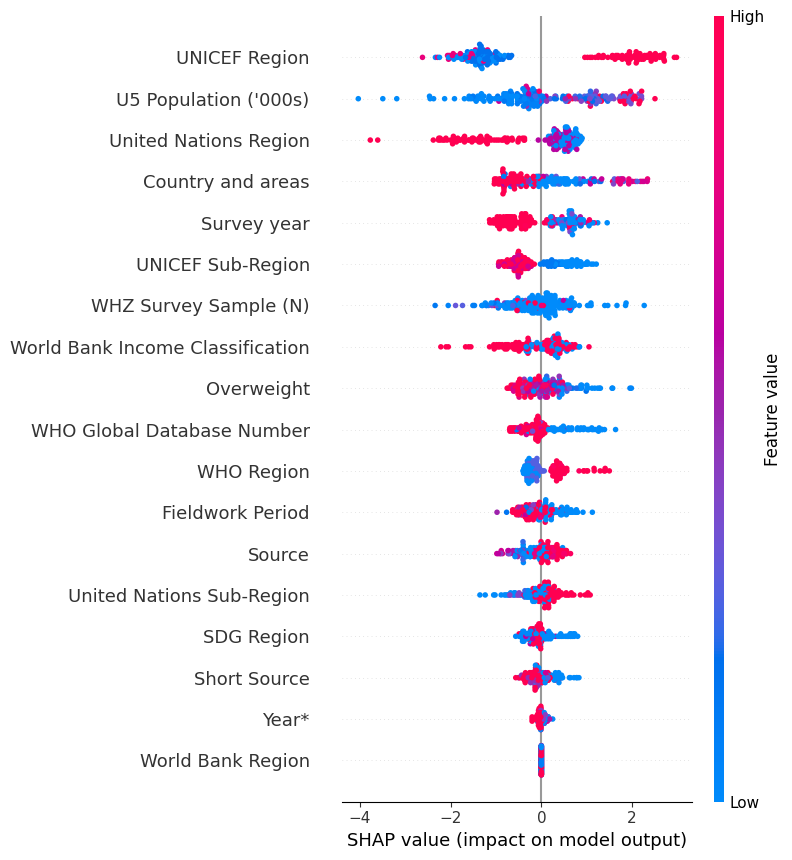

In [ ]:
# Full summary plot (direction + importance)
shap.summary_plot(shap_values_xgb, X_test)

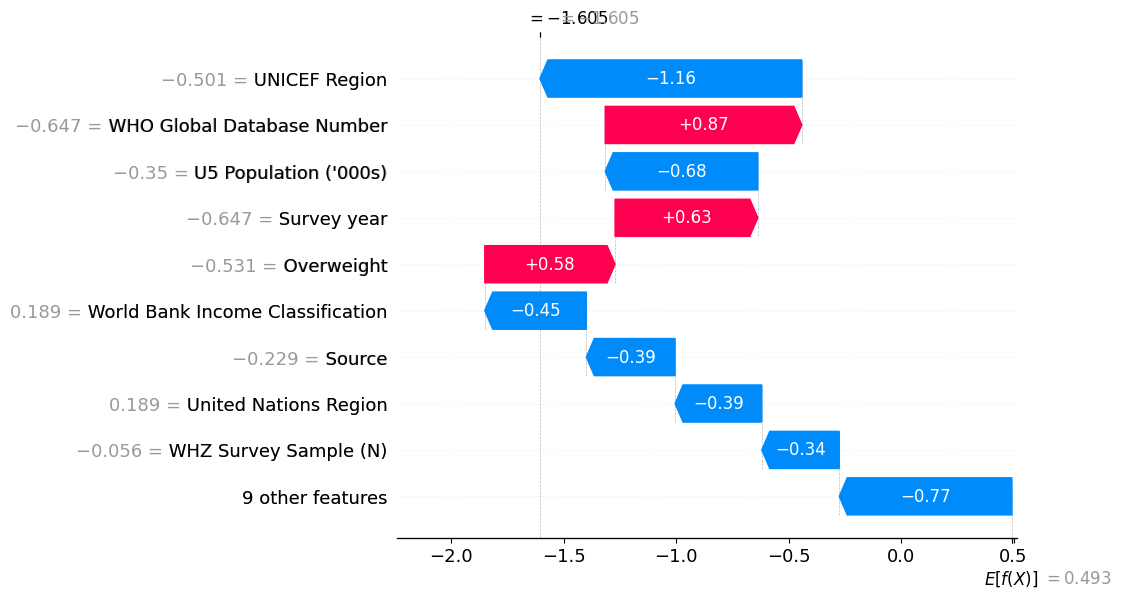

In [ ]:
# Explain a single prediction (local explanation)
shap.plots.waterfall(shap_values_xgb[0])

# *Support Vector Machine*

In [ ]:
#Fit SVM Model
svm_model = SVC(kernel='linear',C=10,probability=True)
svm_model.fit(X_train_scaled,y_train)

SVC(C=10, kernel='linear', probability=True)

In [ ]:
#Get prediction
y_svm_pred = svm_model.predict(X_test_scaled)
y_svm_pred

array([0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1])

In [ ]:
#Evaluate the model
svm_acc = accuracy_score(y_test,y_svm_pred)
print("Accuracy is : ",svm_acc)

Accuracy is :  0.835


In [ ]:
print("Classification report is : ",classification_report(y_test,y_svm_pred))

Classification report is :                precision    recall  f1-score   support

           0       0.86      0.78      0.82        96
           1       0.81      0.88      0.85       104

    accuracy                           0.83       200
   macro avg       0.84      0.83      0.83       200
weighted avg       0.84      0.83      0.83       200



Confusion matrix of Random Forest Classifier [[75 21]
 [12 92]]


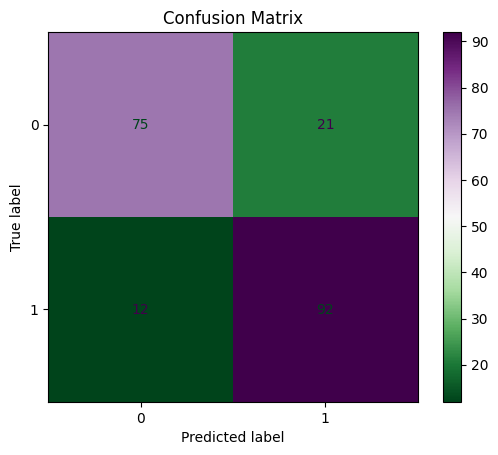

In [ ]:
svm_conf = confusion_matrix(y_test,y_svm_pred)
print("Confusion matrix of Random Forest Classifier",svm_conf)
display_conf = ConfusionMatrixDisplay(confusion_matrix = svm_conf)
display_conf.plot(cmap=plt.cm.PRGn_r)
plt.title('Confusion Matrix')
plt.show()

# *KNeighborsClassifier*

In [ ]:
#Fit KNN Model On data
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [ ]:
#Get prediction
y_knn_pred = knn_model.predict(X_test_scaled)
y_knn_pred

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1])

In [ ]:
#Evaluate the model
knn_acc = accuracy_score(y_test,y_knn_pred)
print("Accuracy is : ",knn_acc)

Accuracy is :  0.805


In [ ]:
print("Classification report is : ",classification_report(y_test,y_knn_pred))

Classification report is :                precision    recall  f1-score   support

           0       0.81      0.77      0.79        96
           1       0.80      0.84      0.82       104

    accuracy                           0.81       200
   macro avg       0.81      0.80      0.80       200
weighted avg       0.81      0.81      0.80       200



Confusion matrix of Random Forest Classifier [[74 22]
 [17 87]]


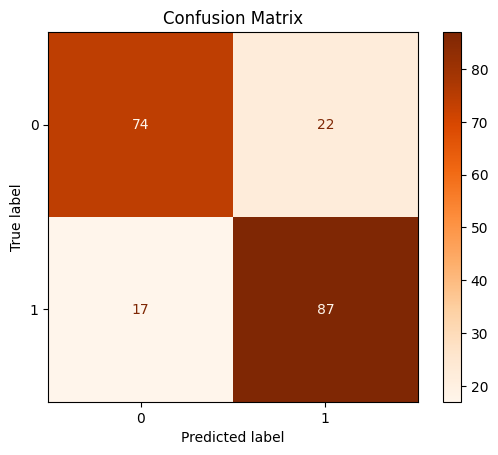

In [ ]:
knn_conf = confusion_matrix(y_test,y_knn_pred)
print("Confusion matrix of Random Forest Classifier",knn_conf)
display_conf = ConfusionMatrixDisplay(confusion_matrix = knn_conf)
display_conf.plot(cmap=plt.cm.Oranges)
plt.title('Confusion Matrix')
plt.show()

# Comparing Between the Classification Models

In [ ]:
# Dictionary to store all results
results = {
    'Logistic Regression': {
        'y_pred': y_log_pred,
        'model': log_model,
        'y_proba': log_model.predict_proba(X_test_scaled)[:, 1]
    },
    'Random Forest': {
        'y_pred': y_rfc_pred,
        'model': rfc,
        'y_proba': rfc.predict_proba(X_test)[:, 1]
    },
    'XGBoost': {
        'y_pred': y_xg_pred,
        'model': xg_model,
        'y_proba': xg_model.predict_proba(X_test)[:, 1]
    },
    'SVM': {
        'y_pred': y_svm_pred,
        'model': svm_model,
        'y_proba': svm_model.decision_function(X_test_scaled)
    },
    'KNN': {
        'y_pred': y_knn_pred,
        'model': knn_model,
        'y_proba': knn_model.predict_proba(X_test_scaled)[:, 1]
    }
}

In [ ]:
# Accuracy, F1, Precision, Recall
metrics = {'Accuracy': [], 'F1': [], 'Precision': [], 'Recall': [], 'Model': []}

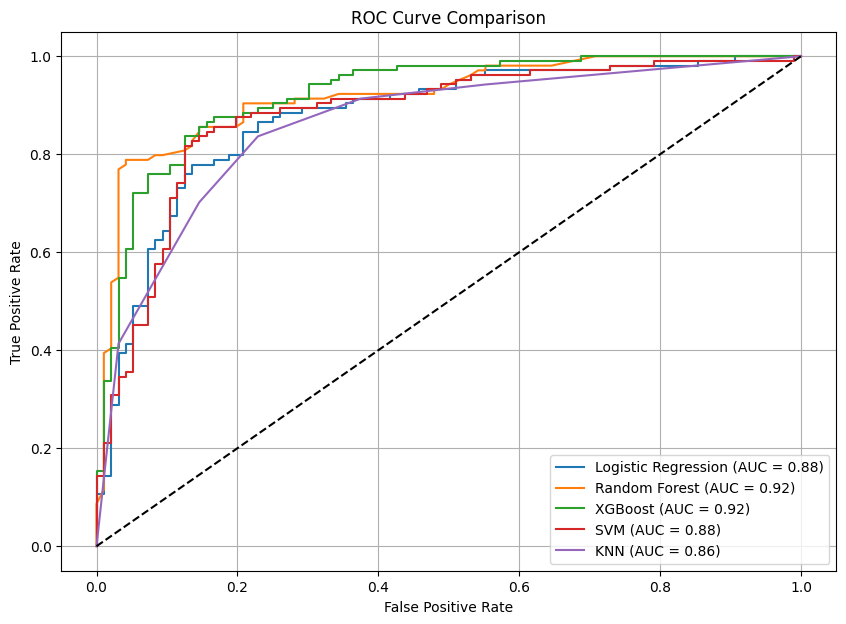

In [ ]:
#ROC Curve
plt.figure(figsize=(10, 7))
for name, result in results.items():
    y_pred = result['y_pred']
    y_proba = result['y_proba']

    metrics['Accuracy'].append(accuracy_score(y_test, y_pred))
    metrics['F1'].append(f1_score(y_test, y_pred))
    metrics['Precision'].append(precision_score(y_test, y_pred))
    metrics['Recall'].append(recall_score(y_test, y_pred))
    metrics['Model'].append(name)


    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_score = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()


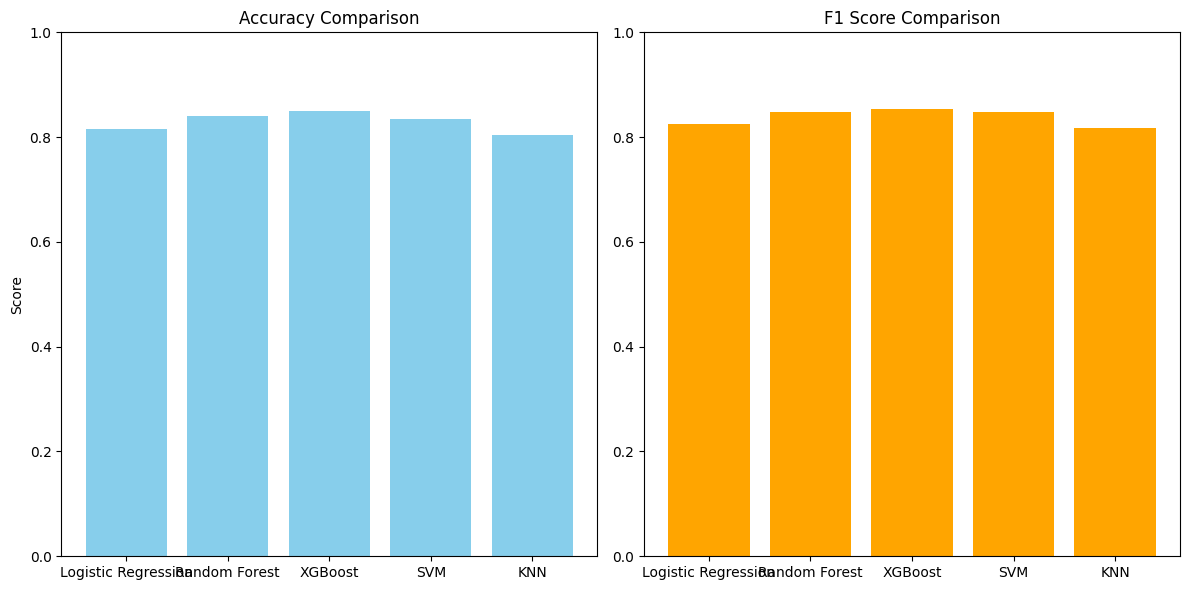

In [ ]:
# Accuracy & F1 Comparison
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(metrics['Model'], metrics['Accuracy'], color='skyblue')
plt.title('Accuracy Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)

plt.subplot(1, 2, 2)
plt.bar(metrics['Model'], metrics['F1'], color='orange')
plt.title('F1 Score Comparison')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

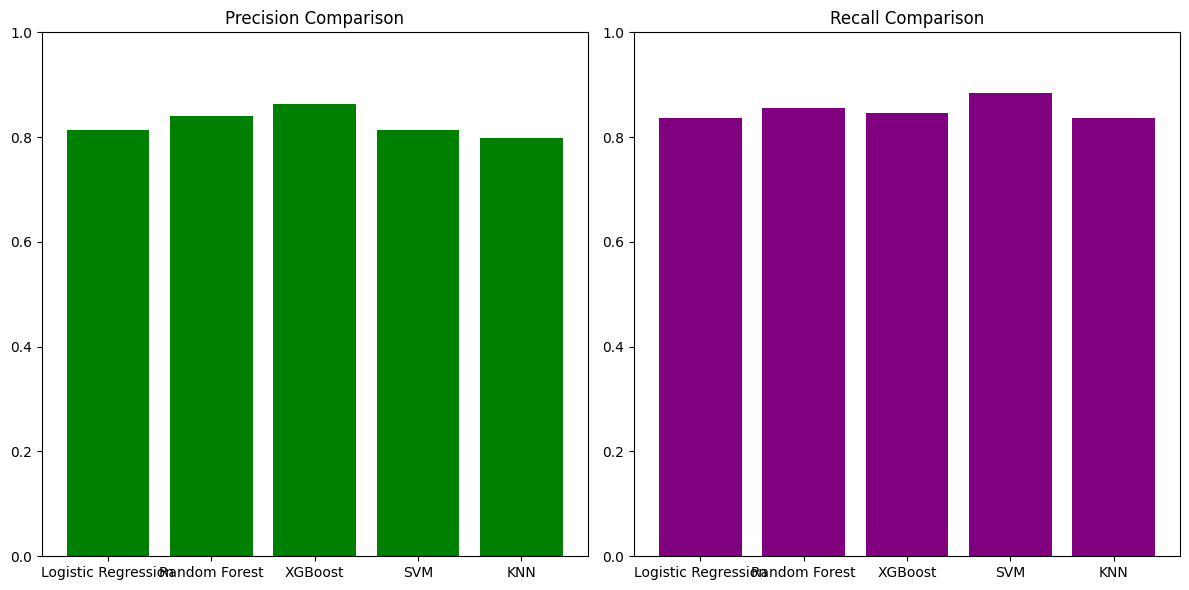

In [ ]:
# Precision & Recall Comparison
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(metrics['Model'], metrics['Precision'], color='green')
plt.title('Precision Comparison')
plt.ylim(0, 1)

plt.subplot(1, 2, 2)
plt.bar(metrics['Model'], metrics['Recall'], color='purple')
plt.title('Recall Comparison')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# **Regression Models**

In [ ]:
x_reg = df.drop(columns=['Malnourished','Severe Wasting', 'Wasting', 'Stunting', 'Underweight','Avg_Malnutrition', 'Underweight_Burden'])
y_reg = df['Avg_Malnutrition']

In [ ]:
X_train_reg , X_test_reg , y_train_reg , y_test_reg = train_test_split(x_reg, y_reg, test_size=0.2, random_state=42)

In [ ]:
#Scaling the train data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train_reg)
x_test_scaled = scaler.transform(X_test_reg)

# *Linear Regression Model*

In [ ]:
lin_model = LinearRegression()
lin_model.fit(x_train_scaled,y_train_reg)

LinearRegression()

In [ ]:
y_lin_pred = lin_model.predict(X_test_reg)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


PermutationExplainer explainer: 101it [00:12,  7.74it/s]                        
<ipython-input-68-e6461e15b0ae>:3: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_linear, X_test_scaled[:100], feature_names=X.columns)


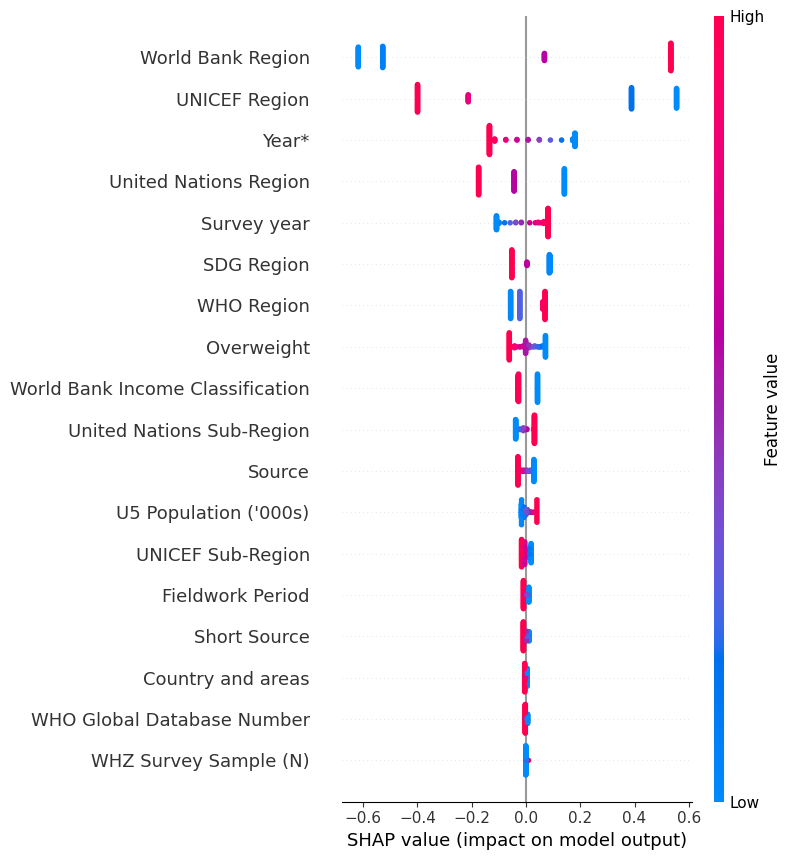

In [ ]:
explainer_linear = shap.Explainer(lin_model.predict, X_train_scaled)
shap_values_linear = explainer_linear(X_test_scaled[:100])
shap.summary_plot(shap_values_linear, X_test_scaled[:100], feature_names=X.columns)

# *Lasso Model*

In [ ]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(x_train_scaled, y_train_reg)

Lasso(alpha=0.1)

In [ ]:
y_lasso_pred = lin_model.predict(X_test_reg)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Explianability Model (Shap)

<ipython-input-71-cc78152c4c53>:3: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_lasso, X_test_scaled[:100], feature_names=X.columns)


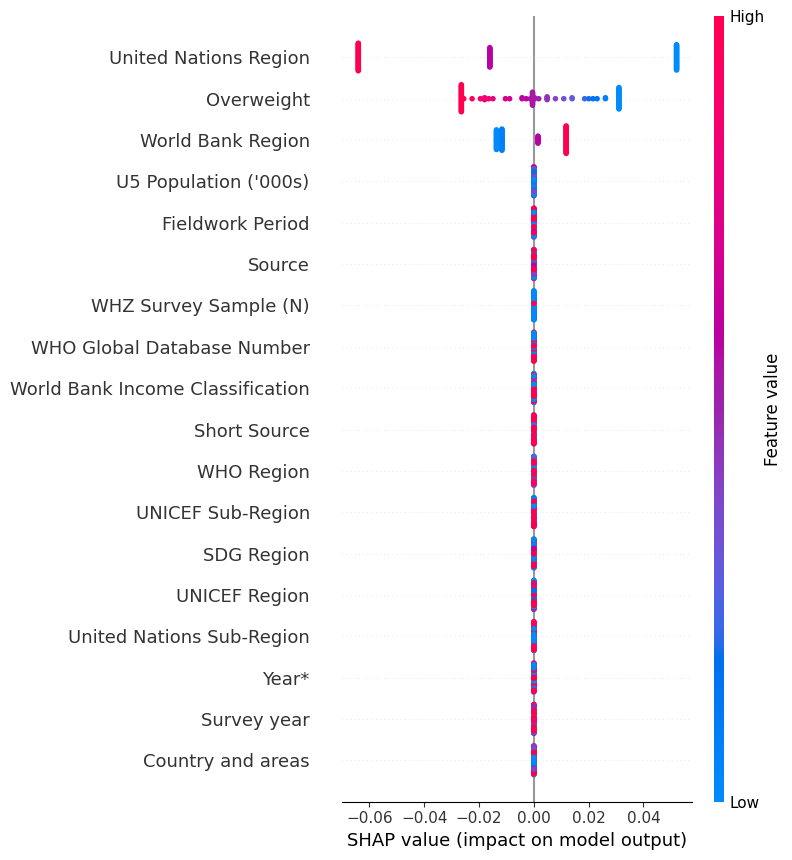

In [ ]:
explainer_lasso = shap.Explainer(lasso_model.predict, X_train_scaled)
shap_values_lasso = explainer_lasso(X_test_scaled[:100])
shap.summary_plot(shap_values_lasso, X_test_scaled[:100], feature_names=X.columns)

# *Decision Tree Regressor Model*

In [ ]:
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train_reg, y_train_reg)

DecisionTreeRegressor(random_state=42)

In [ ]:
y_pred_tree = tree_model.predict(X_test_reg)

Explianability Model(Shap)

<ipython-input-74-a2b02ee9d972>:4: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_dt, X_test_scaled[:100], feature_names=X.columns)


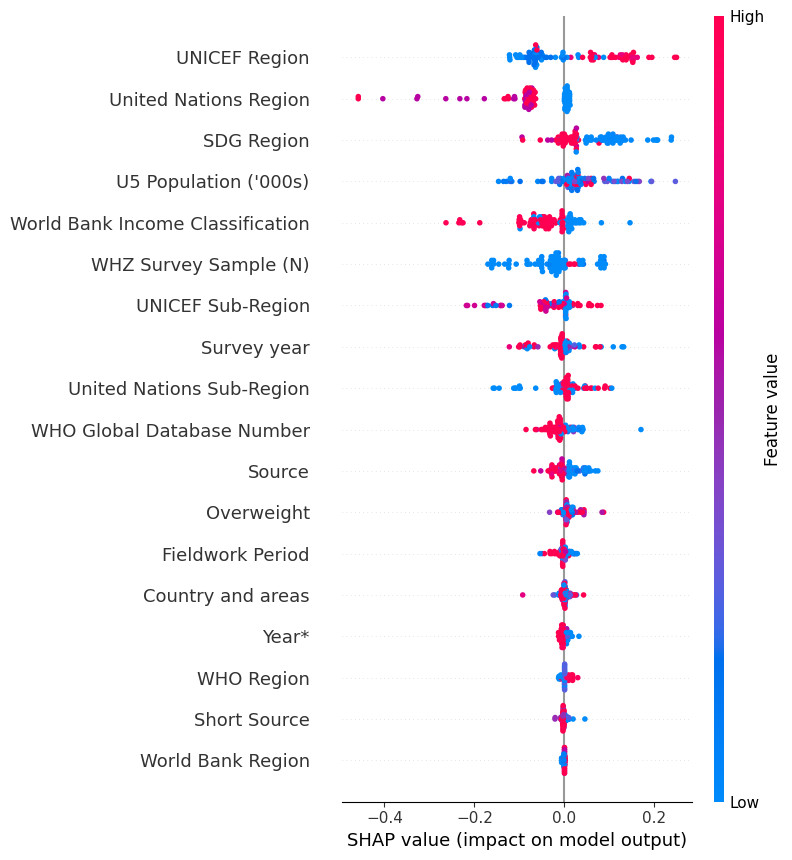

In [ ]:
explainer_dt = shap.Explainer(tree_model)
shap_values_dt = explainer_dt(X_test_scaled[:100])
# Summary plot
shap.summary_plot(shap_values_dt, X_test_scaled[:100], feature_names=X.columns)

# Comparing Between the Regression Models

In [ ]:
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return [mae, mse, rmse, r2]

# Collect results
results = {
    "Linear Regression": evaluate_model(y_test_reg, y_lin_pred),
    "Lasso Regression": evaluate_model(y_test_reg, y_lasso_pred),
    "Decision Tree Regressor": evaluate_model(y_test_reg, y_pred_tree),
}

In [ ]:
# Create a DataFrame for comparison
metrics_df = pd.DataFrame(results, index=["MAE", "MSE", "RMSE", "R2"])
print("Regression Model Evaluation Summary:")
print(metrics_df.T)

Regression Model Evaluation Summary:
                              MAE       MSE      RMSE        R2
Linear Regression        0.229185  0.066245  0.257382  0.299188
Lasso Regression         0.229185  0.066245  0.257382  0.299188
Decision Tree Regressor  0.141424  0.046895  0.216553  0.503895


<Figure size 1000x600 with 0 Axes>

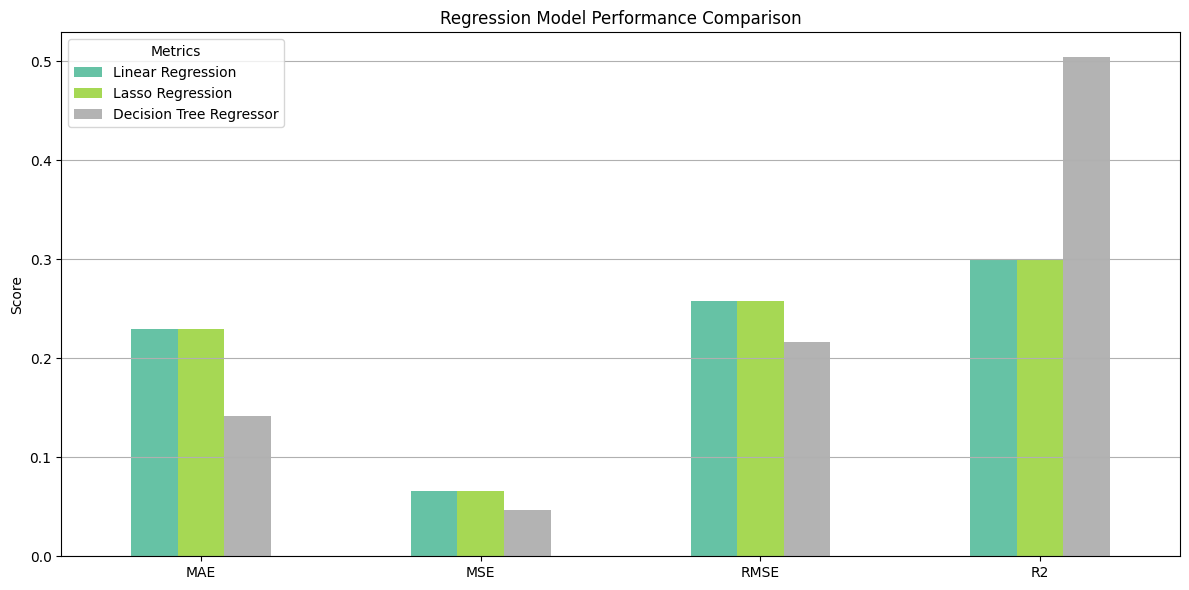

In [ ]:
# Plot
plt.figure(figsize=(10, 6))
metrics_df.plot(kind='bar', figsize=(12, 6), colormap='Set2')
plt.title("Regression Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(title="Metrics")
plt.tight_layout()
plt.show()

# **Unsupervised** **Techniques**

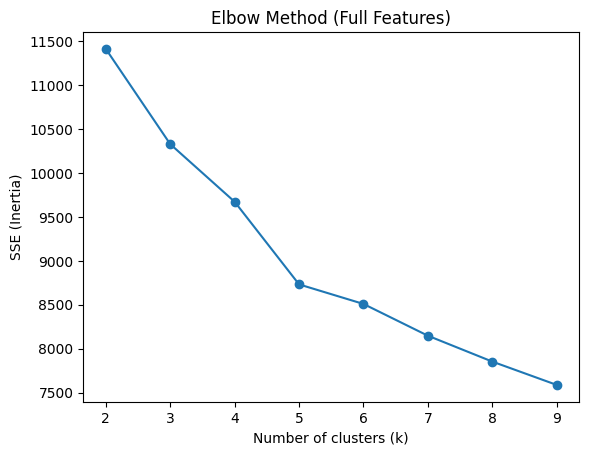

In [ ]:
#K-Means on full scaled training data
sse = []
k_range = range(2, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_scaled)
    sse.append(kmeans.inertia_)

#Plot elbow curve
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method (Full Features)')
plt.show()

In [ ]:
k = 5  # optimal according to plot
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_train_scaled)

In [ ]:
#Append cluster labels to the original data for interpretation
clustered_data = X_train.copy()
clustered_data['Cluster'] = clusters

In [ ]:
#Analyze cluster characteristics
cluster_summary = clustered_data.groupby('Cluster').mean()
print("Cluster Summary:\n", cluster_summary)

Cluster Summary:
          Country and areas  Survey year     Year*  United Nations Region  \
Cluster                                                                    
0                -0.155562     0.158153  0.159365              -0.646529   
1                -0.212565    -0.592721 -0.591020               0.058022   
2                -0.114927     0.117559  0.123487               0.033540   
3                -0.143104     0.013588  0.019673              -0.165191   
4                -0.185315    -0.612539 -0.612264              -0.515696   

         United Nations Sub-Region  SDG Region  UNICEF Region  \
Cluster                                                         
0                        -0.202207    0.188895       0.187191   
1                        -0.193320   -0.526620      -0.565566   
2                        -0.137671   -0.483052      -0.594218   
3                         0.112621   -0.206579       0.108901   
4                        -0.136682    0.061521       0.1561

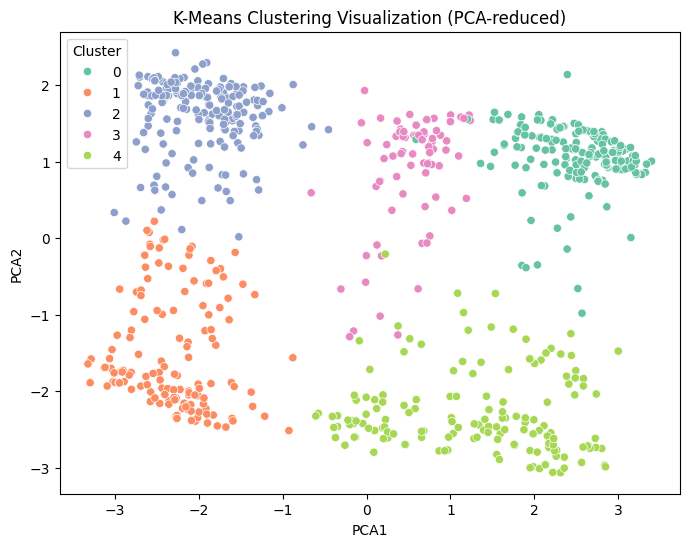

In [ ]:
#Visualize with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = clusters

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title('K-Means Clustering Visualization (PCA-reduced)')
plt.show()

In [ ]:
#Silhouette Score
score = silhouette_score(X_train_scaled, clusters)
print(f"Silhouette Score (Full Features): {score:.2f}")

Silhouette Score (Full Features): 0.18


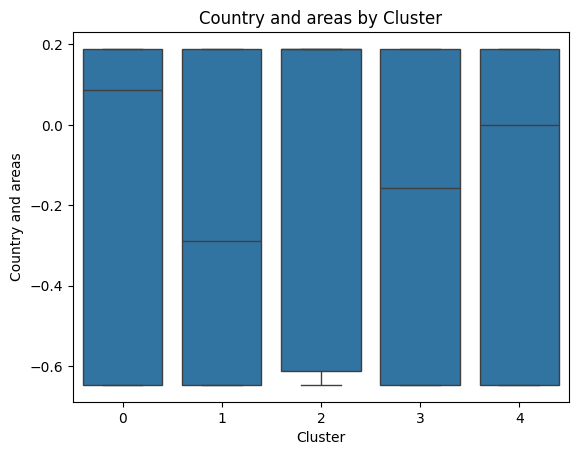

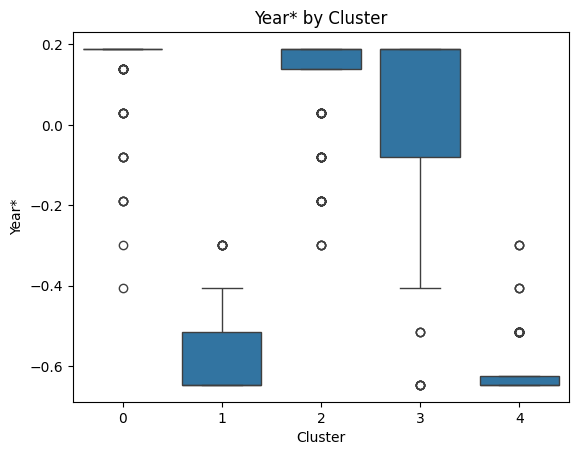

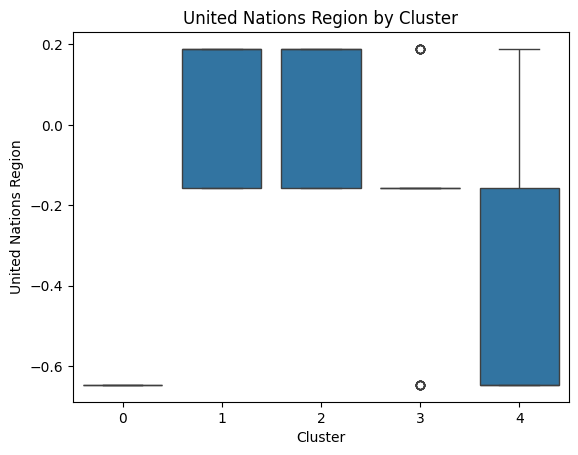

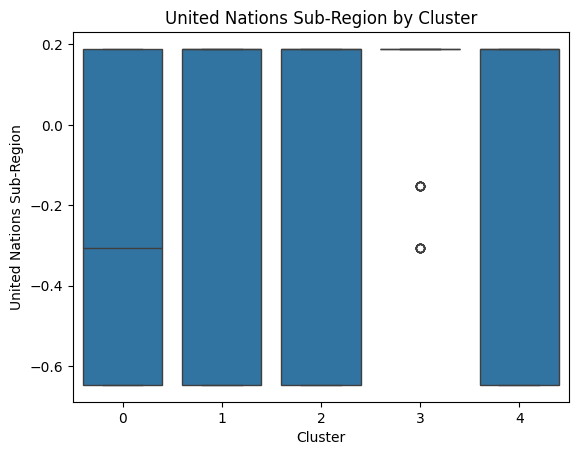

In [ ]:
for col in X.columns[:5]:  # top 5 features
    sns.boxplot(x='Cluster', y=col, data=clustered_data)
    plt.title(f'{col} by Cluster')
    plt.show()


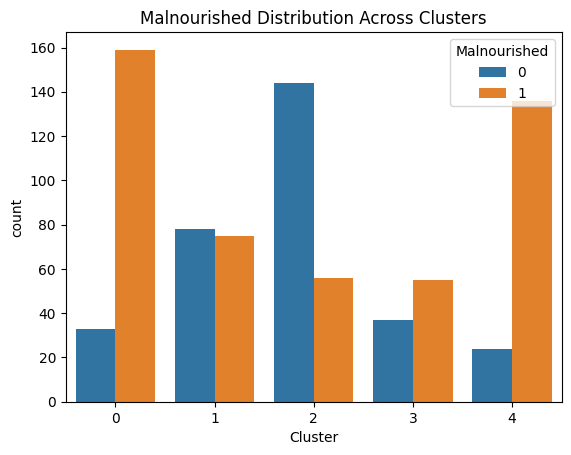

In [ ]:
cluster_label_df = X_train.copy()
cluster_label_df['Cluster'] = clusters
cluster_label_df['Malnourished'] = y_train.values  # if aligned

sns.countplot(data=cluster_label_df, x='Cluster', hue='Malnourished')
plt.title('Malnourished Distribution Across Clusters')
plt.show()

In [ ]:
pca_components = pd.DataFrame(pca.components_, columns=X.columns, index=['PCA1', 'PCA2'])
print(pca_components.T.sort_values(by='PCA1', ascending=False).head())

                       PCA1      PCA2
World Bank Region  0.451180 -0.079609
UNICEF Region      0.448997 -0.090436
SDG Region         0.374120 -0.010633
UNICEF Sub-Region  0.218229 -0.096422
Survey year        0.100371  0.566090


# **Model Optimization with Grid Search**

In [104]:
#Hyber Paramiters
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

In [105]:
#Build Grid Search
grid_search = GridSearchCV(
    estimator=xg_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

In [106]:
#Fit the Model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:32:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200],
                         'subsample': [0.8, 1]},
             scoring='accuracy', verbose=1)

In [ ]:
#Get Best Model Paramiter
best_xgb = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

In [ ]:
y_pred = best_xgb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

In [ ]:
#Confusion matrix
ConfusionMatrixDisplay.from_estimator(best_xgb, X_test, y_test, cmap=plt.cm.Greens)
plt.title('Optimized XGBoost Confusion Matrix')
plt.show()

# Comparing the Model before and After Grid Search

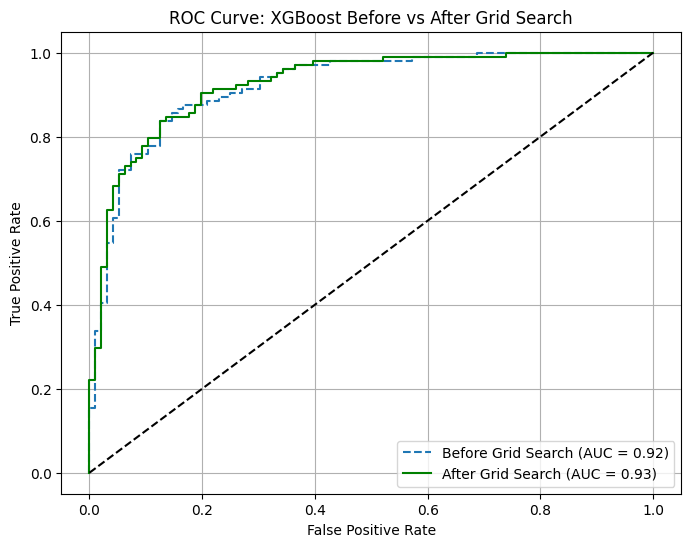

In [107]:
# Before Grid Search
y_proba_before = xg_model.predict_proba(X_test)[:, 1]
fpr_before, tpr_before, _ = roc_curve(y_test, y_proba_before)
auc_before = auc(fpr_before, tpr_before)

# After Grid Search
y_proba_after = best_xgb.predict_proba(X_test)[:, 1]
fpr_after, tpr_after, _ = roc_curve(y_test, y_proba_after)
auc_after = auc(fpr_after, tpr_after)

# 2. Plot ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_before, tpr_before, label=f'Before Grid Search (AUC = {auc_before:.2f})', linestyle='--')
plt.plot(fpr_after, tpr_after, label=f'After Grid Search (AUC = {auc_after:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'k--')

plt.title('ROC Curve: XGBoost Before vs After Grid Search')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Plot Feature Importnace after tunning

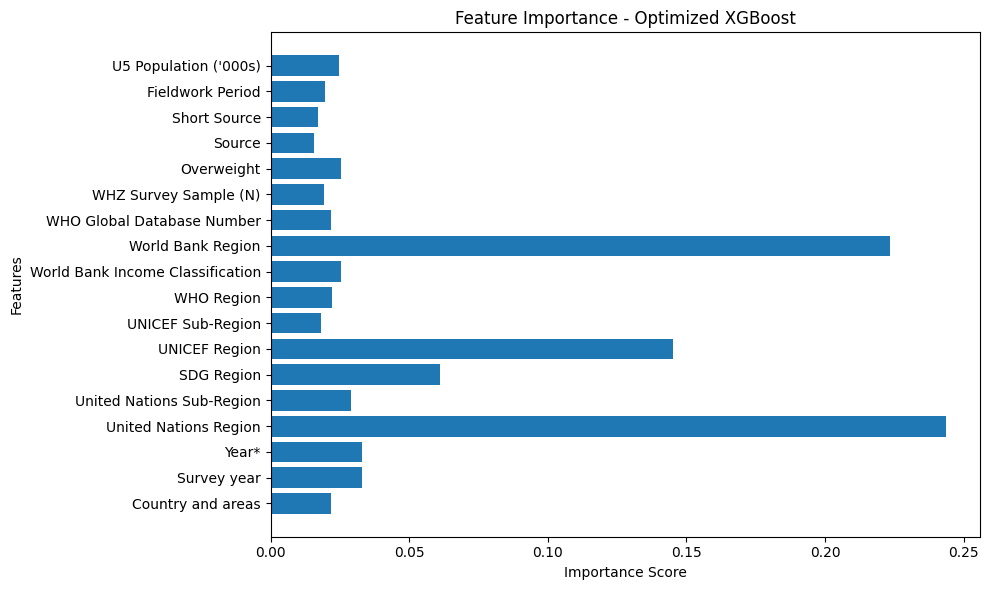

In [108]:
importances = best_xgb.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, importances)
plt.title('Feature Importance - Optimized XGBoost')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

get the cross validation

In [109]:
print("Mean cross-validated accuracy score:", grid_search.best_score_)

Mean cross-validated accuracy score: 0.8519261006289309


check the overfit

In [110]:
train_acc = accuracy_score(y_train, best_xgb.predict(X_train))
test_acc = accuracy_score(y_test, y_pred)
print(f"Train Accuracy: {train_acc:.3f}, Test Accuracy: {test_acc:.3f}")

Train Accuracy: 0.982, Test Accuracy: 0.850


# Pretrain the model on diffrante paramiters to decresses overfiting

In [111]:
#refined hyperparameter grid
param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [3, 4],
    'learning_rate': [0.01, 0.05],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 1.5, 2],
    'min_child_weight': [1, 3, 5]
}

In [112]:
# GridSearchCV
grid_search = GridSearchCV(
    estimator=xg_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

In [113]:
# Fit the model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 2592 candidates, totalling 12960 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:01:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1], 'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.05], 'max_depth': [3, 4],
                         'min_child_weight': [1, 3, 5],
                         'n_estimators': [200, 300],
                         'reg_alpha': [0, 0.01, 0.1], 'reg_lambda': [1, 1.5, 2],
                         'subsample': [0.8, 1]},
             scoring='accuracy', verbose=1)

In [114]:
# Best model
best_xgb = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0.2, 'learning_rate': 0.05, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 300, 'reg_alpha': 0, 'reg_lambda': 1.5, 'subsample': 1}


In [115]:
# Evaluate best model
y_pred = best_xgb.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.85
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.85        96
           1       0.86      0.85      0.85       104

    accuracy                           0.85       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.85      0.85      0.85       200



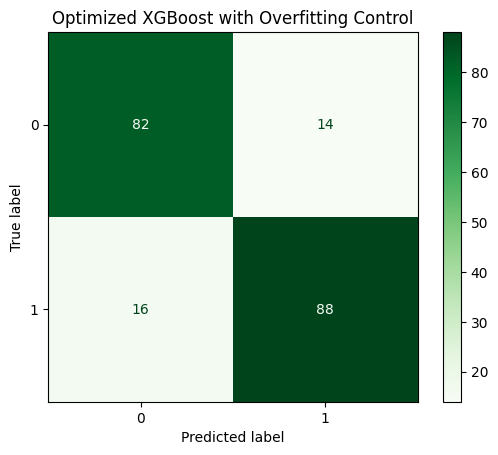

In [116]:
# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(best_xgb, X_test, y_test, cmap=plt.cm.Greens)
plt.title('Optimized XGBoost with Overfitting Control')
plt.show()

In [117]:
import joblib
# Save the model
joblib.dump(best_xgb, 'optimized_xgboost_model.pkl')

['optimized_xgboost_model.pkl']